<a href="https://colab.research.google.com/github/rj-pal/Percolation/blob/main/Percolation_comparison_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percolation Test Results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Check GPU connection
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jun 19 02:49:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
import sys
sys.path.append('drive/MyDrive/modules')

In [5]:
# To meet the requirements of the Percolation Visualization Class- not used here

!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from Percolation import *
import matplotlib.pyplot as plt

In [7]:
threshold_average = []
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
qu = 'QuickUnion'
qf = 'QuickFind'
pc_times = []
wqu_times = []
qu_times = []
qf_times = []
for i in range(11):
    size = (i + 2) ** 2
    mc = MonteCarlo(size, 100)
    print(f"Tests for network size: {size}")
    print("__________________________")
    pc_result = mc.monte_carlo_percolation_test(pc, randomized=False, seed_value=3)
    pc_times.append(pc_result[1])
    threshold_average.append(pc_result[0])
    print()
    wqu_result = mc.monte_carlo_percolation_test(wqu, randomized=False, seed_value=3)
    wqu_times.append(wqu_result[1])
    print()
    qu_result = mc.monte_carlo_percolation_test(qu, randomized=False, seed_value=3)
    qu_times.append(qu_result[1])
    print()
    qf_result = mc.monte_carlo_percolation_test(qf, randomized=False, seed_value=3)
    qf_times.append(qf_result[1])
    print()
print(f"The average threshold of percolation for 100 iterations across network sizes 4 to 12 is: {sum(threshold_average)/len(threshold_average)}")

Tests for network size: 4
__________________________
Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: PathCompression
monte_carlo_percolation_test: Elapsed time of 0.011766433715820312 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: WeightedQuickUnion
monte_carlo_percolation_test: Elapsed time of 0.012960672378540039 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: QuickUnion
monte_carlo_percolation_test: Elapsed time of 0.00998234748840332 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: QuickFind
monte_carlo_percolation_test: Elapsed time of 0.013758182525634766 s

Tests for network size: 9
__________________________
Percolation Threshold Average: 59.5553%
Board Size: 9
Iterations: 100
Algorithm: PathCompression
monte_carlo_percolation_test: Elapsed time of 0.06012320518493652 s

Percolation Threshold Average: 59.5553%
Board Size: 9
Iterations: 100
Algorithm: 

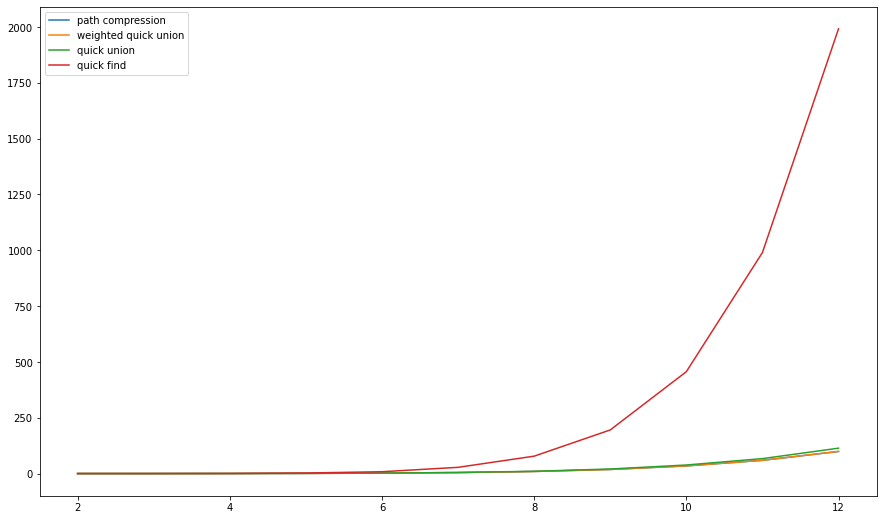

In [8]:
x = [x for x in range(2, 13, 1)]
y1 = pc_times
y2 = wqu_times
y3 = qu_times
y4 = qf_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.plot(x, y3, label = "quick union")
plt.plot(x, y4, label = "quick find")
plt.legend()
plt.show()

In [ ]:
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
qu = 'QuickUnion'
pc_times = []
wqu_times = []
qu_times = []
for i in [100, 500, 1000, 2500, 5000]:
    size = 100
    times = i
    mc = MonteCarlo(size, i)
    print(f"Size {size} x {size} at {i} iterations")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {qu}")
    qu_times.append(mc.monte_carlo_full_connection_test(qu, seed_value=3, show_results=False)[1])
    print()

Size 100 x 100 at 100 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 6.341034412384033 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 6.041508674621582 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 27.71798038482666 s

Size 100 x 100 at 500 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 31.781149864196777 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 29.83543872833252 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 139.72334575653076 s

Size 100 x 100 at 1000 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 63.35952186584473 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 59.6325802803039

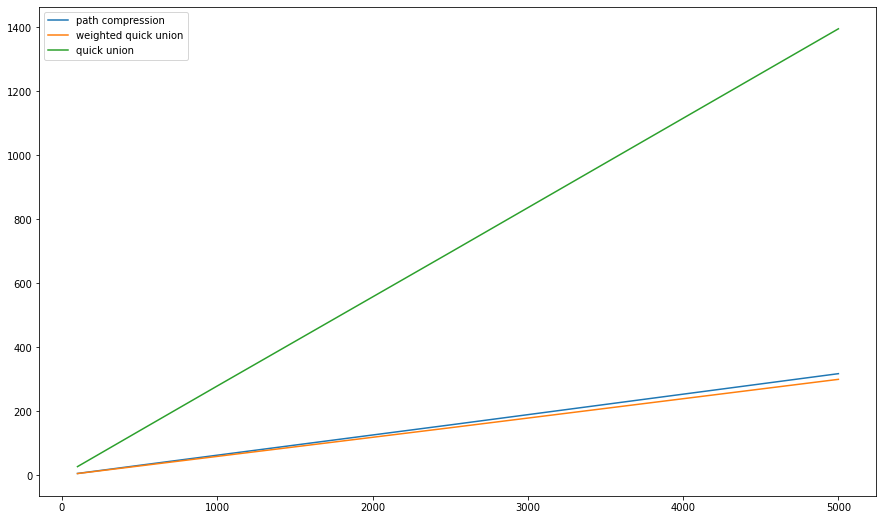

In [ ]:
x = [100, 500, 1000, 2500, 5000]
y1 = pc_times
y2 = wqu_times
y3 = qu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.plot(x, y3, label = "quick union")
plt.legend()
plt.show()

In [ ]:
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
pc_times = []
wqu_times = []
for size in range(1000, 10001, 500):
    mc = MonteCarlo(size, 1)
    print(f"Size {size} x {size} at one iteration")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()

Size 1000 x 1000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 7.748592853546143 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 7.579691410064697 s

Size 1500 x 1500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 17.930012702941895 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 17.46544623374939 s

Size 2000 x 2000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 32.17445206642151 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 31.95862889289856 s

Size 2500 x 2500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 50.80096411705017 s

Algorith

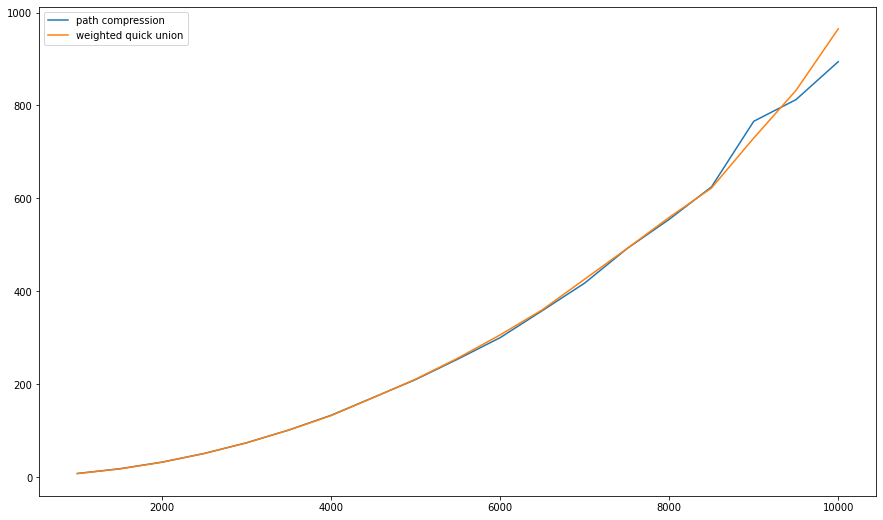

In [ ]:
x = [x for x in range(1000, 10001, 500)]
y1 = pc_times
y2 = wqu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.legend()

plt.show()

In [ ]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
mc = MonteCarlo(15000, 1)
print(f"Algorithm: {pc}")
mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=True)
print()
print(f"Algorithm: {wqu}")
mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=True)
print()

Algorithm: PathCompression
Board Size: 15000 x 15000
Iterations: 1
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 2149.26775097847 s

Algorithm: WeightedQuickUnion
Board Size: 15000 x 15000
Iterations: 1
Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 2124.195415019989 s

